In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import torch
%matplotlib inline

In [2]:
from textblob import TextBlob

# Import DFs

In [3]:
train_df = pd.read_csv("drugsComTrain_raw.csv")

In [4]:
test_df = pd.read_csv("drugsComTest_raw.csv")

In [38]:
from sklearn.model_selection import train_test_split
val_df, test_df = train_test_split(test_df, train_size=0.5)


In [13]:
train_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


EDA to check out the distributions of ratings and missing values based on: 
https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics


In [14]:
# Find missing values train
train_df.isnull().sum()

#must fix the missing conditions

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,161297.0,115923.585305,67004.445170,2.0,58063.0,115744.0,173776.0,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


In [16]:
train_df.info()
print('=============='*10)
train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [6]:
df = train_df
plt.figure(figsize=(20,10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

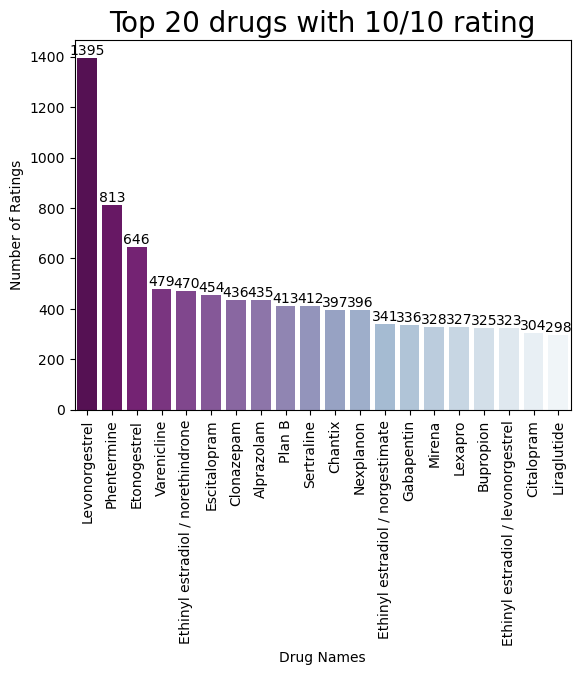

In [7]:
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()


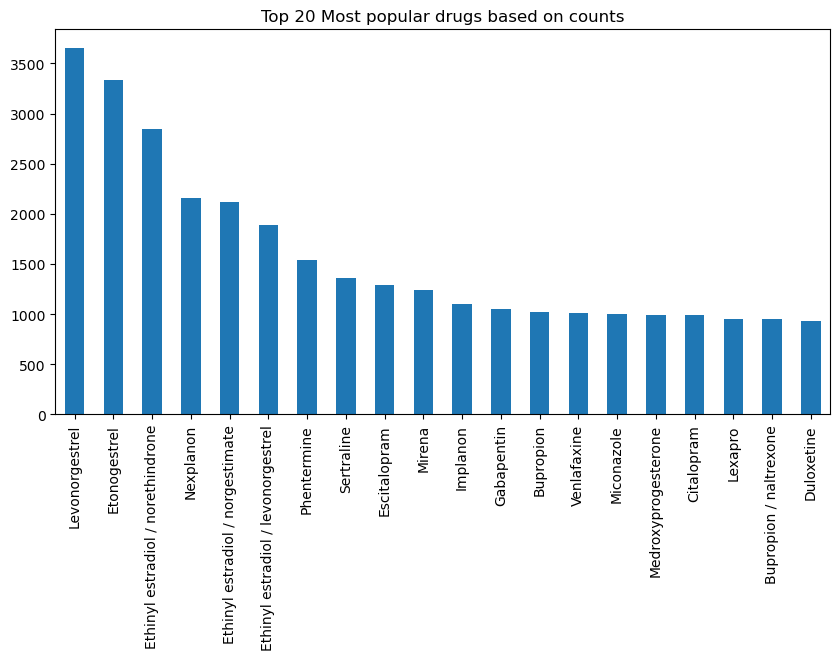

In [9]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(10,5))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [10]:
df['condition'].value_counts()


Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [11]:
df['condition'].value_counts().nsmallest(20)

Meningococcal Meningitis Prophylaxis                     1
mist (                                                   1
Cluster-Tic Syndrome                                     1
Syringomyelia                                            1
Gestational Diabetes                                     1
Aspergillosis, Aspergilloma                              1
Pseudogout, Prophylaxis                                  1
Portal Hypertension                                      1
Reversal of Nondepolarizing Muscle Relaxants             1
47</span> users found this comment helpful.              1
Short Stature for Age                                    1
Neurotic Depression                                      1
Cerebral Edema                                           1
me                                                       1
Hyperuricemia Secondary to Chemotherapy                  1
Prevention of Perinatal Group B Streptococcal Disease    1
Small Bowel or Pancreatic Fistula                       

In [13]:
drug_per_cond = df.groupby('condition')['drugName'].nunique().nlargest(20)
drug_per_cond



condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

In [16]:
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

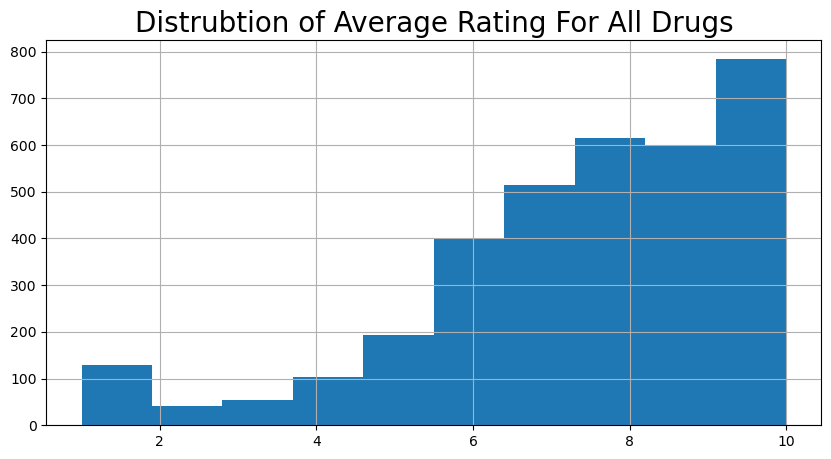

In [17]:


# Average Rating For All Drugs
plt.figure(figsize=(10,5))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs", fontsize=20)
plt.show()
#Most reviews are positive



# Sentiment analysis of reviews

For this I used the library Textblob, which is based on NLTK, but it is faster and easier to use for quick analysis because you can skip the tokenizing and stop word removal. We could also use Vader separately.
The documentation for the polarity and subjectivity functions can be found in: https://textblob.readthedocs.io/en/dev/quickstart.html

In [28]:
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity



def get_polarity_label(value):
    pol = value
    if pol > 0:
        result = 'positive'
    elif pol < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

def get_polarity_label_torch(value):
    pol = value
    if pol > 0:
        result = 0
    elif pol < 0:
        result = 1
    else:
        result = 2
    return result

def get_subjectivity_label(value):
    sub = value
    if sub >  0.66:
        result = 'subjective'
    elif sub < 0.33:
        result = 'objective'
    else:
        result = 'neutral'
    return result

    #0.0 is very objective and 1.0 is very subjective.

Polarity goes from [-1,1] and refers to the negative or positive sentiment of the text, it also takes into account exclamation marks, emojis and other meta verbal data.
Amount of personal opinion contrasted by objective information in the text. Think of it as opinions vs facts. Goes from [0,1]

In [70]:
# Sentiment Score for Review
def add_sent_analysis_cols(df, sett = 'train', save = True):
    df['sentiment'] = df['review'].apply(get_polarity)
    df['subjectivity'] = df['review'].apply(get_subjectivity)
    df['sentiment_label'] = df['sentiment'].apply(get_polarity_label)
    df['subjectivity_label'] = df['subjectivity'].apply(get_subjectivity_label)
    df['sl_torch'] = df['sentiment'].apply(get_polarity_label_torch)
    if save:
        df.to_csv(sett +'_withSA.csv') #You can comment this line if necessary
    return df

In [42]:
train_df = add_sent_analysis_cols(train_df )

In [71]:
val_df = add_sent_analysis_cols(val_df, sett= 'val', save=True)

In [144]:
train_df = pd.read_csv('train_withSA.csv',index_col=False )

In [142]:
train_df.head()

,Unnamed: 0.1,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,sentiment_label,subjectivity,subjectivity_label,sl_torch
0,0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.000000,neutral,0.000000,objective,2
1,1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.168333,positive,0.431349,neutral,0
2,2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.067210,positive,0.402155,neutral,0
3,3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.179545,positive,0.665909,subjective,0
4,4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.194444,positive,0.401389,neutral,0


In [73]:
val_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,subjectivity,sentiment_label,subjectivity_label,sl_torch
8624,160175,Buspirone,Anxiety,"""I have been on Buspar for about 2 months now ...",3,24-Jul-17,13,-0.085556,0.485556,negative,neutral,1
19707,65760,Propranolol,mance Anxiety,"""Wow, can I say? This drug is amazing! I had t...",10,1-Jul-16,12,0.288889,0.742593,positive,subjective,0
40509,135048,Chlorthalidone,Edema,"""I have tried this medication but in the spani...",10,16-Apr-09,55,0.175000,0.225000,positive,objective,0
35390,127504,Phentermine,Weight Loss,"""I went to my doctor because I was 128.6 kgs. ...",9,1-Sep-17,14,-0.164541,0.501616,negative,neutral,1
49789,87041,Latuda,Bipolar Disorde,"""sever headaches and nausea. \r\nAwaiting the ...",1,26-Oct-15,13,0.000000,0.000000,neutral,objective,2


# BERT for SA

In [44]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
#Bert base: 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

In [199]:
def get_att_tensors(df):
    text = df.review.values
    encoding = tokenizer.batch_encode_plus(text, add_special_tokens=True,  truncation=True, return_token_type_ids=False, padding = True, max_length=256, return_attention_mask=True, return_tensors='pt' )
    input_ids = encoding['input_ids']
    attention_masks = encoding['attention_mask']
    labels = torch.tensor(df.sl_torch.values) 
    #return np.array((input_ids, attention_masks, labels),dtype=object)
    return input_ids, attention_masks, labels

In [193]:
temp_train = train_df[:100].apply(get_att_tensors, axis=1)
#input_ids_train, attention_masks_train, labels_train = temp_train[0, :], temp_train[1,:], temp_train[2,:]


/tmp/ipykernel_10727/971304037.py:7: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array((input_ids, attention_masks, labels),dtype=object)


In [198]:
temp_train[:][0]

array([tensor([[  101,  1000,  2009,  2038,  2053,  2217,  3466,  1010,  1045,  2202,
                 2009,  1999,  5257,  1997,  2011, 16033, 10415,  1019, 11460,  1998,
                 3869,  3514,  1000,   102]])                                        ,
       tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
       tensor(2)], dtype=object)

In [178]:
 attention_masks_train

[tensor([[  101,  1000,  2026,  2365,  2003,  8576,  2083,  2010,  2959,  2733,
           1997, 20014, 19496,  2615,  1012,  2057,  2150,  4986,  2043,  2002,
           2211,  2023,  2197,  2733,  1010,  2043,  2002,  2318,  2635,  1996,
           3284, 13004,  2002,  2097,  2022,  2006,  1012,  2005,  2048,  2420,
           1010,  2002,  2071,  6684,  2131,  2041,  1997,  2793,  1010,  2001,
           2200, 27987,  2100,  1010,  1998,  7771,  2005,  3053,  1022,  2847,
           2006,  1037,  3298,  2188,  2013,  2082, 10885,  1006,  2200,  5866,
           2005,  2032,  1012,  1007,  1045,  2170,  2010,  3460,  2006,  6928,
           2851,  1998,  2016,  2056,  2000,  6293,  2009,  2041,  1037,  2261,
           2420,  1012,  2156,  2129,  2002,  2106,  2012,  2082,  1010,  1998,
           2007,  2893,  2039,  1999,  1996,  2851,  1012,  1996,  2197,  2048,
           2420,  2031,  2042,  3291,  2489,  1012,  2002,  2003,  2172,  2062,
           5993,  3085,  2084,  2412,  1

In [191]:
print(input_ids_train)
print(attention_masks_train.shape)
print(labels_train.shape)

[tensor([[  101,  1000,  2009,  2038,  2053,  2217,  3466,  1010,  1045,  2202,
          2009,  1999,  5257,  1997,  2011, 16033, 10415,  1019, 11460,  1998,
          3869,  3514,  1000,   102]]), tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), tensor(2)]


AttributeError: 'list' object has no attribute 'shape'

In [200]:
input_ids_val, attention_masks_val, labels_val = get_att_tensors(val_df)

In [202]:
print(input_ids_val.shape)
print(attention_masks_val.shape)
print(labels_val.shape)

torch.Size([26883, 256])
torch.Size([26883, 256])
torch.Size([26883])


In [106]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
dataset_train = TensorDataset( input_ids_train, attention_masks_train,  labels_train)


AssertionError: Size mismatch between tensors

In [ ]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
     num_labels=len(label_dict),
     output_attentions=False,
     output_hidden_states=False)

